In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
%matplotlib inline

In [88]:
df = pd.read_csv('Project/data_files/san_francisco/airbnb_union.csv')

#Setting datetime type
df['date_collected'] = df['date_collected'].astype('datetime64[ns]')
#Creating year column
df ['year'] = df['date_collected'].dt.year

In [89]:
df.describe()

,room_id,host_id,borough,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,year
count,2.055320e+05,2.055260e+05,0.0,205483.000000,159178.000000,197111.000000,194842.000000,205532.000000,134055.000000,205532.000000,205532.000000,205532.000000
mean,7.020337e+06,1.820178e+07,NaN,21.064959,3.959432,3.082111,1.346198,252.027290,3.528656,37.768150,-122.430243,2016.040636
std,4.841478e+06,2.250471e+07,NaN,39.716682,1.807185,1.931360,0.897208,437.442457,9.051024,0.021394,0.025123,0.791602
min,9.580000e+02,4.600000e+01,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,37.708278,-122.513065,2013.000000
25%,2.433743e+06,2.597104e+06,NaN,1.000000,4.500000,2.000000,1.000000,108.000000,1.000000,37.754118,-122.441740,2016.000000
50%,6.988943e+06,8.539143e+06,NaN,5.000000,5.000000,2.000000,1.000000,167.000000,2.000000,37.770237,-122.425592,2016.000000
75%,1.077237e+07,2.580596e+07,NaN,22.000000,5.000000,4.000000,2.000000,256.000000,3.000000,37.785236,-122.412920,2017.000000
max,1.978199e+07,1.395538e+08,NaN,513.000000,5.000000,18.000000,10.000000,30000.000000,1000.000000,37.831093,-122.363243,2017.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205532 entries, 0 to 205531
Data columns (total 16 columns):
room_id                 205532 non-null int64
host_id                 205526 non-null float64
room_type               205489 non-null object
borough                 0 non-null float64
neighborhood            205532 non-null object
reviews                 205483 non-null float64
overall_satisfaction    159178 non-null float64
accommodates            197111 non-null float64
bedrooms                194842 non-null float64
price                   205532 non-null int64
minstay                 134055 non-null float64
latitude                205532 non-null float64
longitude               205532 non-null float64
last_modified           205532 non-null object
date_collected          205532 non-null datetime64[ns]
year                    205532 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 25.1+ MB


In [91]:
display(df.groupby('room_type')['room_type'].count())

room_type
Entire home/apt    121681
Private room        76404
Shared room          7404
Name: room_type, dtype: int64

In [92]:
host_grouped = df[df['room_type'] == 'Entire home/apt'].\
groupby(['date_collected','host_id'])['room_id'].count().to_frame().rename(columns={'room_id':'home_count'})

In [93]:
host_grouped

home_count
date_collected host_id                
2013-11-17     38836.0               1
               40784.0               3
               44565.0               1
               95558.0               3
               97769.0               1
               103427.0              1
               112300.0              1
               127367.0              2
               204441.0              1
               232759.0              2
               235797.0              1
               255971.0              1
               326840.0              1
               364983.0              1
               384824.0              1
               389384.0              1
               417293.0              1
               428414.0              1
               551618.0              1
               652918.0              1
               654601.0              1
               661691.0              3
               667672.0              1
               677432.0              1
               757108.0              1
               779744.0              1
               876342.0              1
               919364.0              1
               1098676.0             1
               1223992.0             1
...                                ...
2017-07-10     135936845.0           1
               136103114.0           1
               136191158.0           1
               136252039.0           1
               136263848.0           1
               136311374.0           1
               136545050.0           1
               136631769.0           1
               136697755.0           1
               136792470.0           1
               136835158.0           1
               137491875.0           1
               137534021.0           1
               137584663.0           1
               137684925.0           1
               137702512.0           1
               137719050.0           1
               137740313.0           1
               137892550.0           1
               137916556.0           1
               137990461.0           1
               138051904.0           1
               138067390.0           1
               138744209.0           1
               138966286.0           1
               139004053.0           1
               139132883.0           1
               139134376.0           1
               139315170.0           1
               139553832.0           1

[109964 rows x 1 columns]

In [94]:
host_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109964 entries, (2013-11-17 00:00:00, 38836.0) to (2017-07-10 00:00:00, 139553832.0)
Data columns (total 1 columns):
home_count    109964 non-null int64
dtypes: int64(1)
memory usage: 1.2 MB


In [95]:
host_grouped['bin'] = pd.cut(x = host_grouped['home_count'], bins =[0,1,1000], labels = ['1','2+'])

In [96]:
host_grouped.tail()

home_count bin
date_collected host_id                    
2017-07-10     139004053.0           1   1
               139132883.0           1   1
               139134376.0           1   1
               139315170.0           1   1
               139553832.0           1   1

In [97]:
host_grouped.groupby('bin').count()

,home_count
bin,
1,103629
2+,6335


In [98]:
pd.crosstab(host_grouped['home_count'],host_grouped['bin']).sum()

bin
1     103629
2+      6335
dtype: int64

In [99]:
host_grouped[host_grouped['bin'] == '1']['home_count'].sum()

103629

In [100]:
host_grouped[host_grouped['bin'] == '2+']['home_count'].sum()

18052

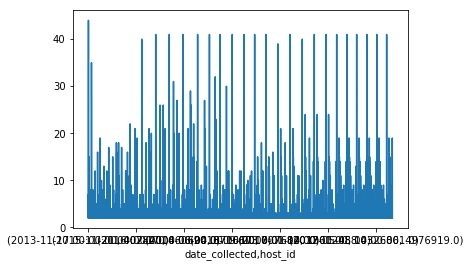

In [101]:
host_grouped[host_grouped['bin'] == '2+']['home_count'].plot()

In [102]:
host_grouped.head()

home_count bin
date_collected host_id                
2013-11-17     38836.0           1   1
               40784.0           3  2+
               44565.0           1   1
               95558.0           3  2+
               97769.0           1   1

In [103]:
host_grouped.mean()

home_count    1.106553
dtype: float64

In [104]:
host_binned = host_grouped.groupby([host_grouped.index.get_level_values(0),'bin']).count().unstack()
#Sorting correctly
host_binned = host_binned.loc[host_binned.index.sort_values()]

In [122]:
#creating percentage version of host_binned
#host_binned.iloc[:,0]

host_binned_prop = pd.concat([(host_binned.iloc[:,0] / host_binned.sum(axis=1)),
           (host_binned.iloc[:,1] / host_binned.sum(axis=1))],axis=1, names = ['blah','bah']).round(2)
#Setting column names
host_binned_prop.columns = ['1','2+']

In [124]:
host_binned_prop

,1,2+
date_collected,,
2013-11-17,0.94,0.06
2014-05-11,0.93,0.07
2014-08-24,0.93,0.07
2015-02-19,0.92,0.08
2015-08-21,0.93,0.07
2015-10-21,0.94,0.06
2015-11-21,0.92,0.08
2015-12-14,0.92,0.08
2016-01-16,0.93,0.07


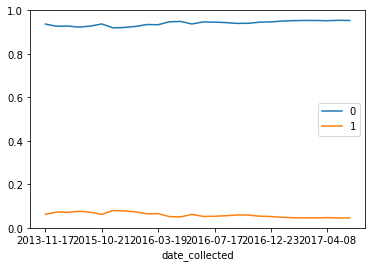

In [63]:
host_binned_prop.plot()

In [126]:
#Checking grouped by year
year_grouped = df[df['room_type'] == 'Entire home/apt'].\
groupby(['year','host_id'])['room_id'].count().to_frame().rename(columns={'room_id':'home_count'})

In [107]:
year_grouped['bin'] = pd.cut(x = year_grouped['home_count'], bins =[0,1,1000], labels = ['1','2+'])

In [125]:
year_grouped.groupby('bin').count()

,home_count
bin,
1,5307
2+,17911


I grouped by year to compare against Tableau. I can now exclude this as the reason for the incorrect numbers in Tableau.